In [14]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import math

In [15]:
def approx_contours(contours, epsilon_factor=0.02):
    approximated_contours = []
    for contour in contours:
        epsilon = epsilon_factor * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approximated_contours.append(approx)
    return approximated_contours

def remove_nested_rectangles(rectangles):
    non_nested = []
    for rect in rectangles:
        x1, y1, w1, h1 = rect
        nested = False
        for other_rect in rectangles:
            if other_rect == rect:
                continue
            x2, y2, w2, h2 = other_rect
            if x1 >= x2 and y1 >= y2 and x1 + w1 <= x2 + w2 and y1 + h1 <= y2 + h2:
                nested = True
                break
        if not nested:
            non_nested.append(rect)
    return non_nested

def merge_rectangles(rectangles, distance_threshold):
    merged = []
    while rectangles:
        a = rectangles.pop(0)
        to_merge = [a]
        i = 0
        while i < len(rectangles):
            b = rectangles[i]
            if is_close(a, b, distance_threshold):
                to_merge.append(b)
                rectangles.pop(i)
            else:
                i += 1
        xs = [x for x, _, w, _ in to_merge for x in [x, x+w]]
        ys = [y for _, y, _, h in to_merge for y in [y, y+h]]
        merged.append((min(xs), min(ys), max(xs) - min(xs), max(ys) - min(ys)))
    return merged

def is_close(rect1, rect2, threshold):
    """
    Check if two rectangles are close to each other based on a threshold.
    """
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    center1 = (x1 + w1 / 2, y1 + h1 / 2)
    center2 = (x2 + w2 / 2, y2 + h2 / 2)
    distance = np.hypot(center1[0] - center2[0], center1[1] - center2[1])
    return distance < threshold

Image: 1040.png, GPR: 1.4, Simplified GPR: 1.4, Storeys:5,  Site area: 23065.1, Building pixels: 5645, Mask pixels: 16203, Generated GPR: 1.7419613651792878


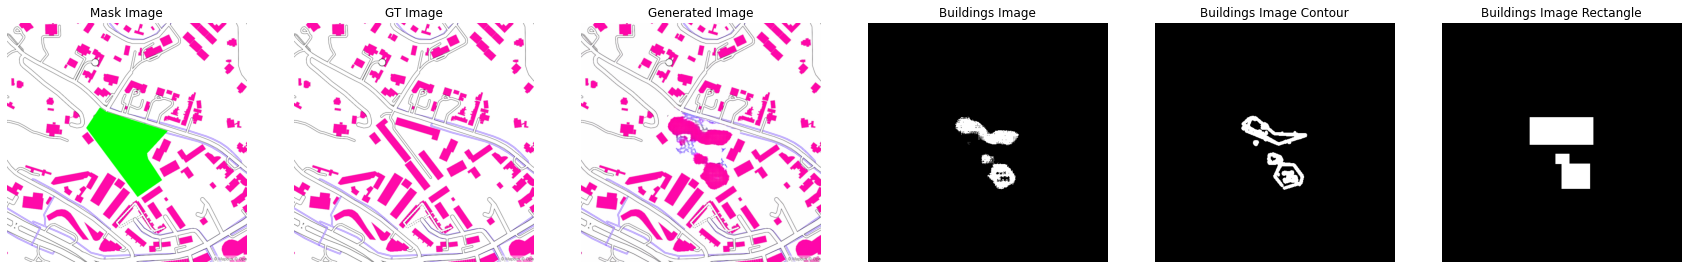

Image: 1074.png, GPR: 2.5, Simplified GPR: 2.8, Storeys:12,  Site area: 37265.0, Building pixels: 1197, Mask pixels: 27439, Generated GPR: 0.5234884653230802


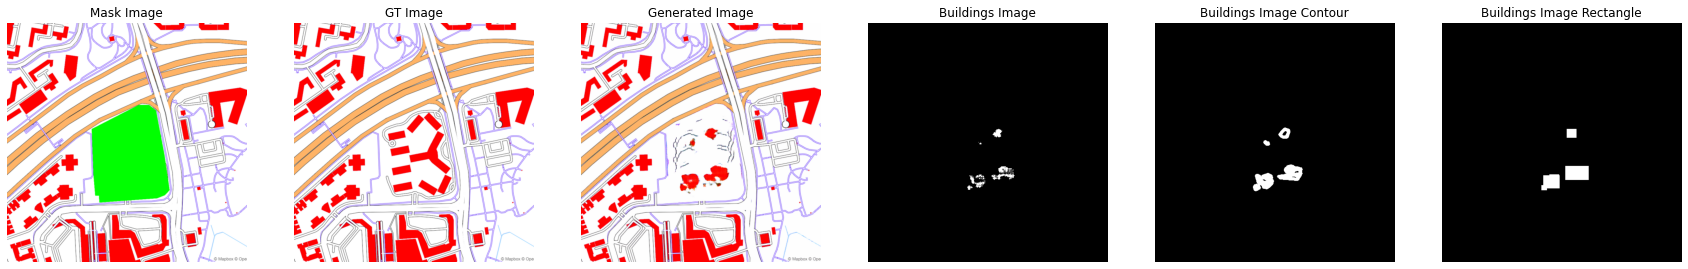

Image: 1076.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:36,  Site area: 10414.2, Building pixels: 761, Mask pixels: 8554, Generated GPR: 3.202712181435586


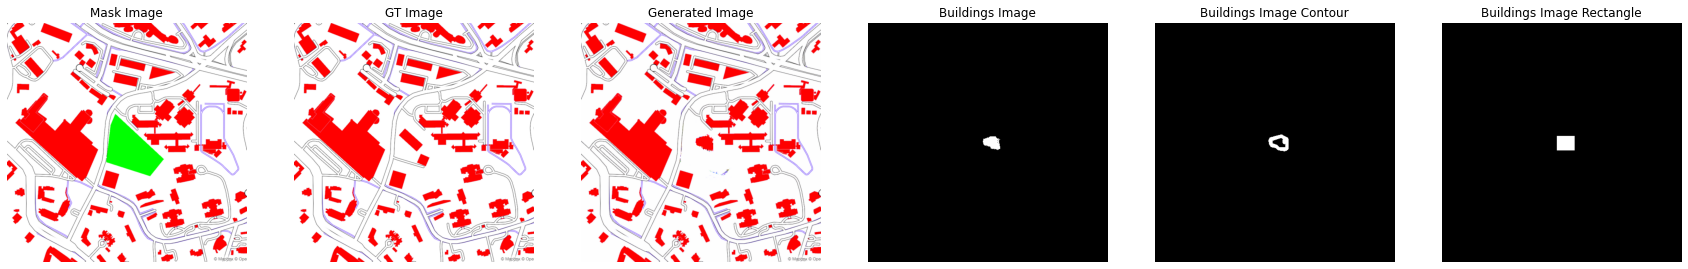

Image: 1102.png, GPR: 1.6, Simplified GPR: 1.6, Storeys:12,  Site area: 6157.3, Building pixels: 154, Mask pixels: 4778, Generated GPR: 0.386772708246128


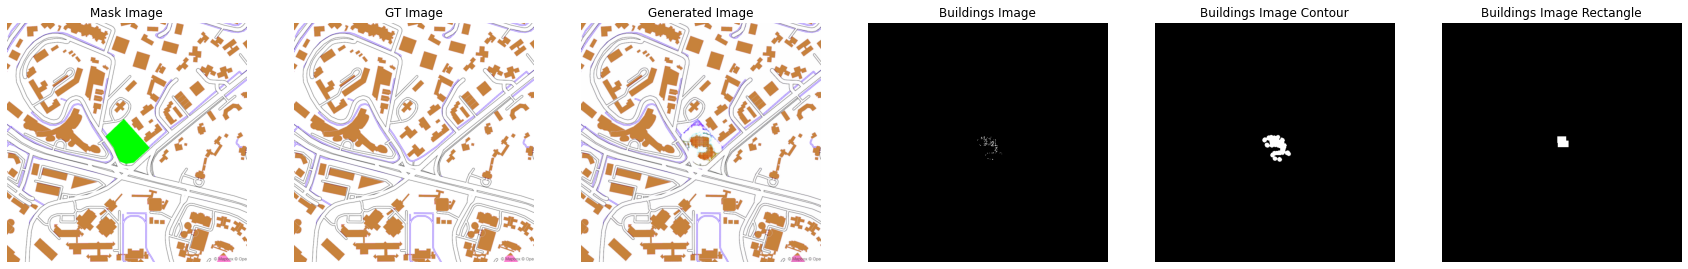

Image: 1180.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:15,  Site area: 19547.0, Building pixels: 622, Mask pixels: 14355, Generated GPR: 0.6499477533960293


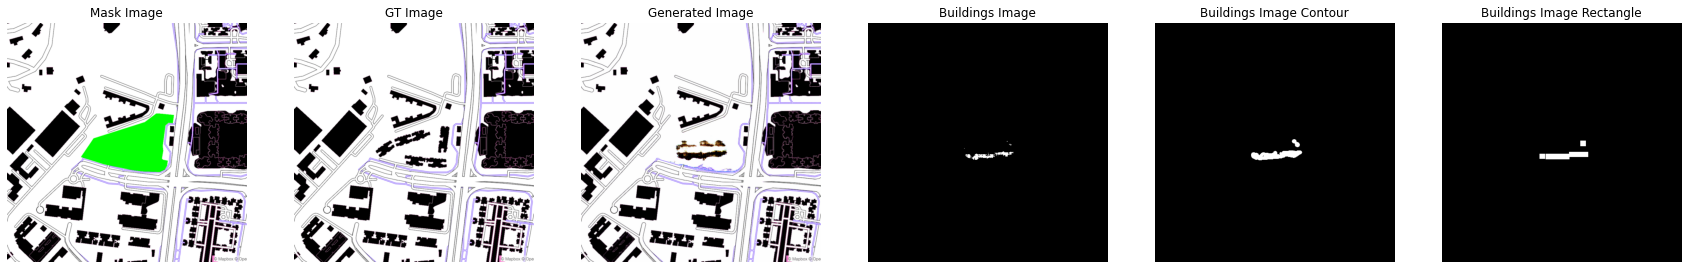

Image: 1379.png, GPR: 1.4, Simplified GPR: 1.4, Storeys:5,  Site area: 17455.9, Building pixels: 5207, Mask pixels: 12216, Generated GPR: 2.131221349050426


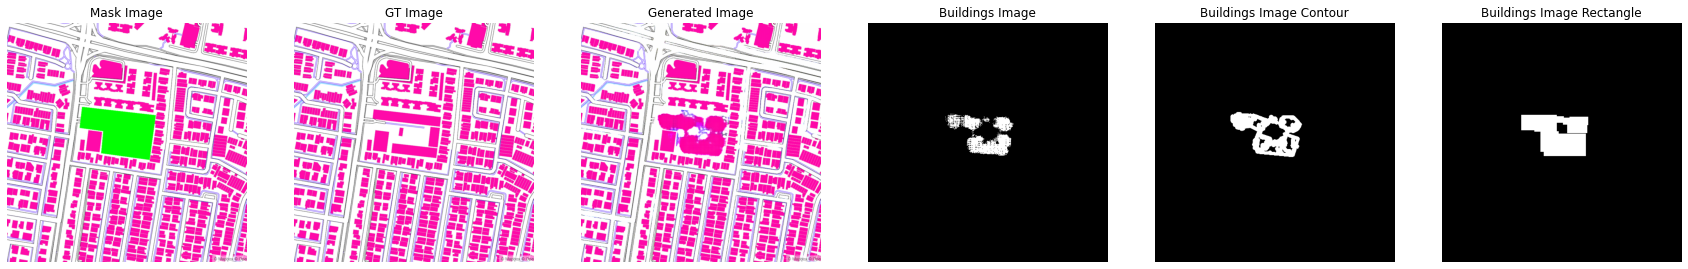

Image: 145.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:15,  Site area: 22094.4, Building pixels: 1236, Mask pixels: 16292, Generated GPR: 1.1379818315737786


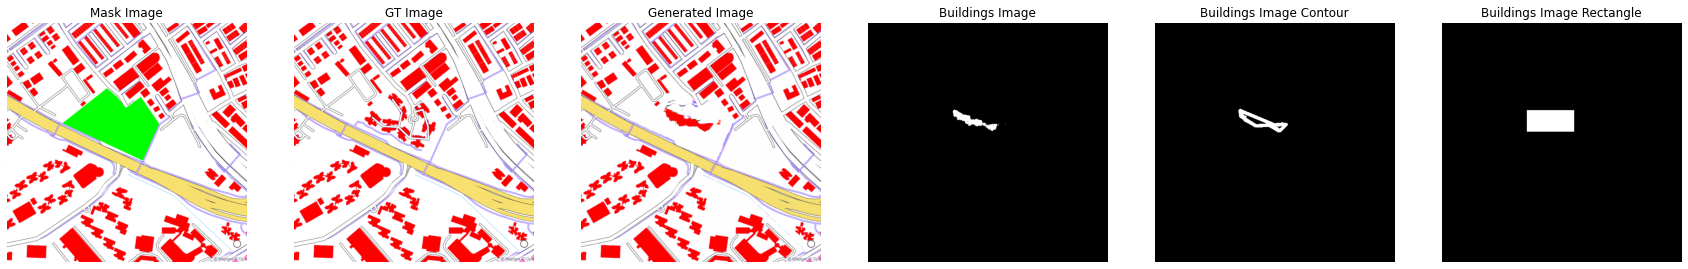

Image: 1484.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:17,  Site area: 10097.1, Building pixels: 474, Mask pixels: 7670, Generated GPR: 1.0505867014341592


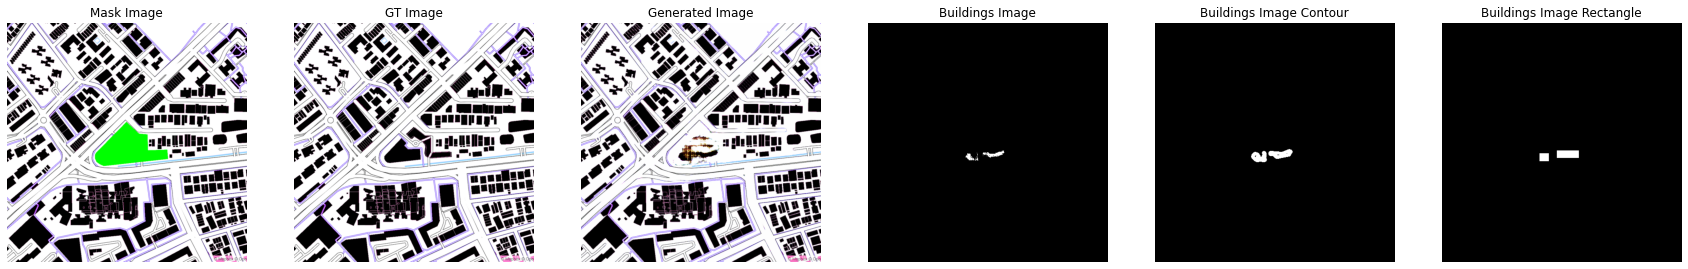

Image: 1602.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:17,  Site area: 13564.8, Building pixels: 832, Mask pixels: 9962, Generated GPR: 1.4197952218430032


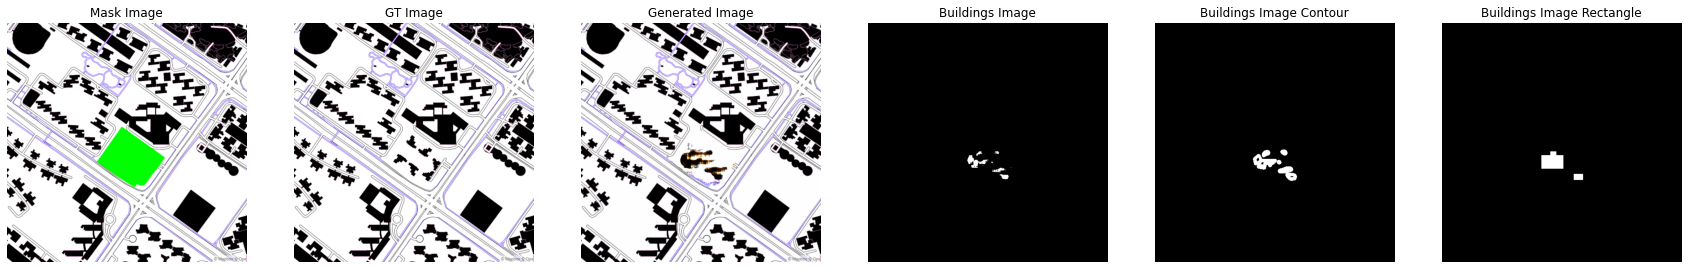

Image: 1655.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:18,  Site area: 27418.2, Building pixels: 524, Mask pixels: 21829, Generated GPR: 0.4320857574785835


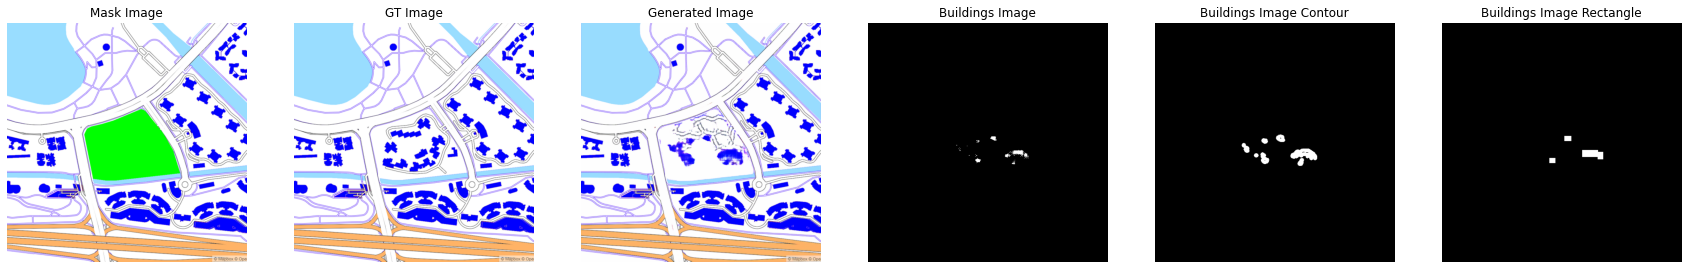

Image: 1670.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:13,  Site area: 17940.2, Building pixels: 1425, Mask pixels: 11806, Generated GPR: 1.5691173979332544


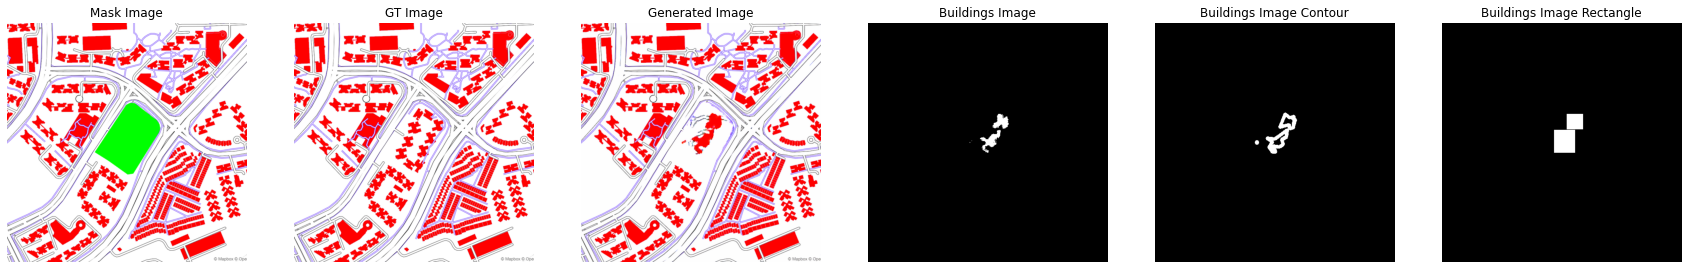

Image: 1796.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:17,  Site area: 13877.2, Building pixels: 920, Mask pixels: 9365, Generated GPR: 1.6700480512546716


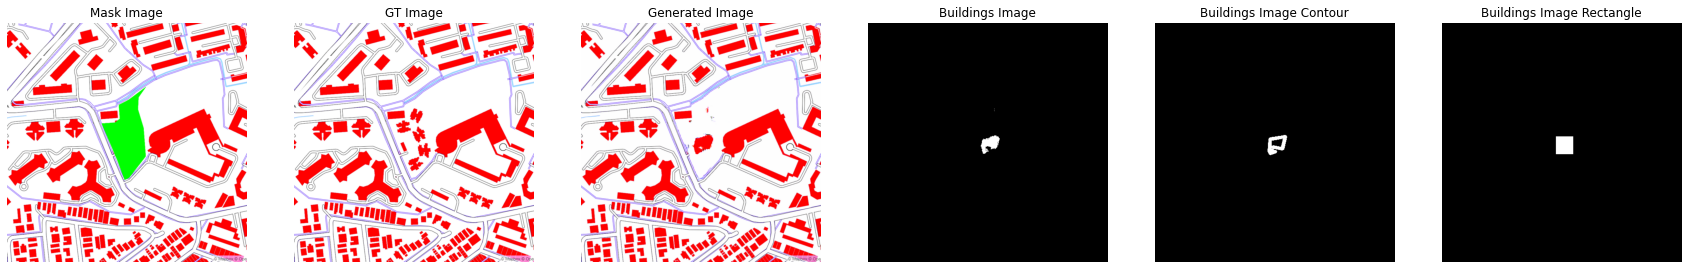

Image: 1811.png, GPR: 1.4, Simplified GPR: 1.4, Storeys:5,  Site area: 7255.7, Building pixels: 2127, Mask pixels: 5237, Generated GPR: 2.030742791674623


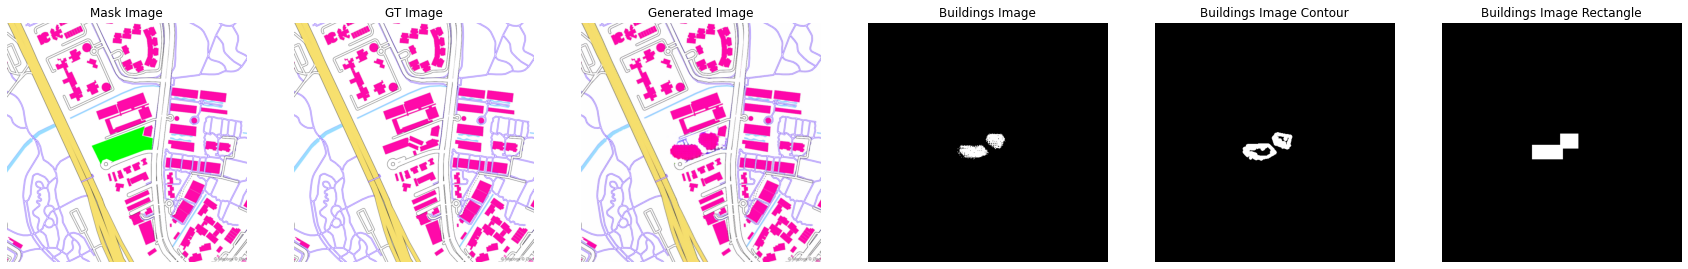

Image: 1876.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:19,  Site area: 10502.8, Building pixels: 234, Mask pixels: 8276, Generated GPR: 0.5372160463992266


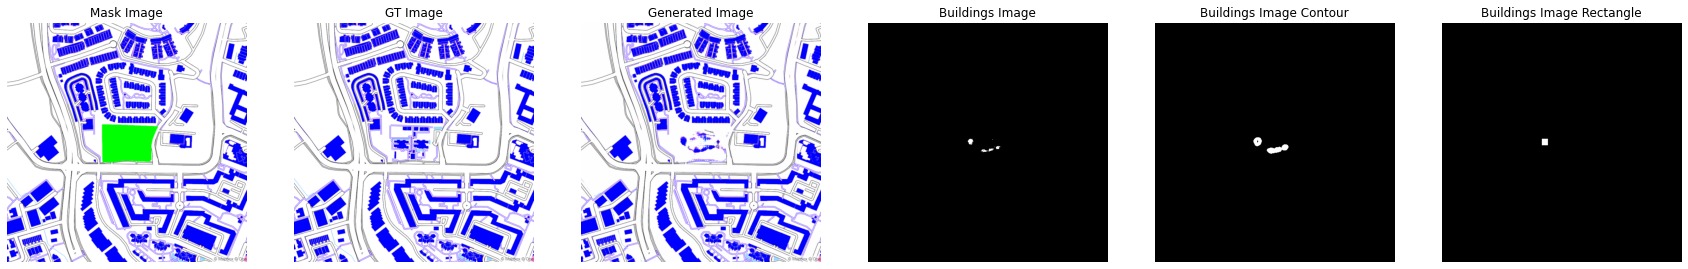

Image: 191.png, GPR: 3.5, Simplified GPR: 3.0, Storeys:18,  Site area: 13000.3, Building pixels: 1684, Mask pixels: 9208, Generated GPR: 3.2919200695047786


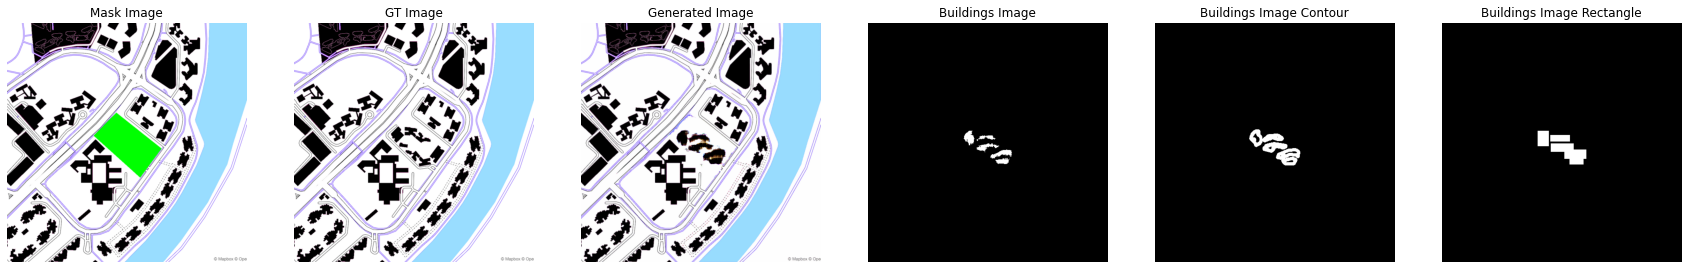

Image: 2000.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:17,  Site area: 13241.8, Building pixels: 926, Mask pixels: 9680, Generated GPR: 1.6262396694214876


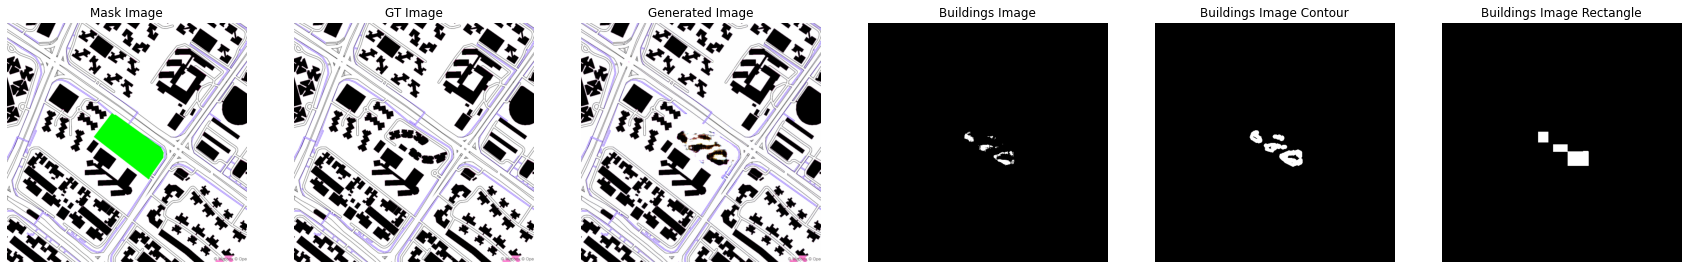

Image: 434.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:16,  Site area: 39401.6, Building pixels: 553, Mask pixels: 28711, Generated GPR: 0.3081745672390373


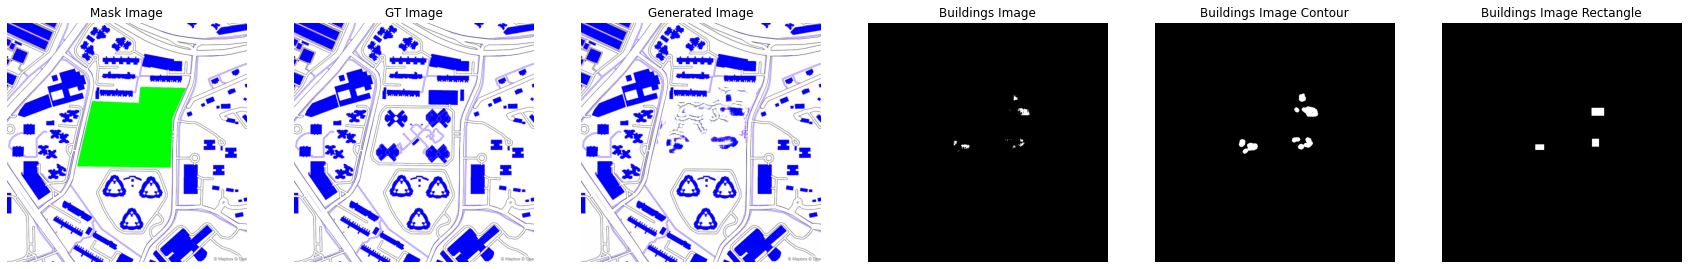

Image: 489.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:15,  Site area: 28692.65, Building pixels: 350, Mask pixels: 20526, Generated GPR: 0.2557731657410114


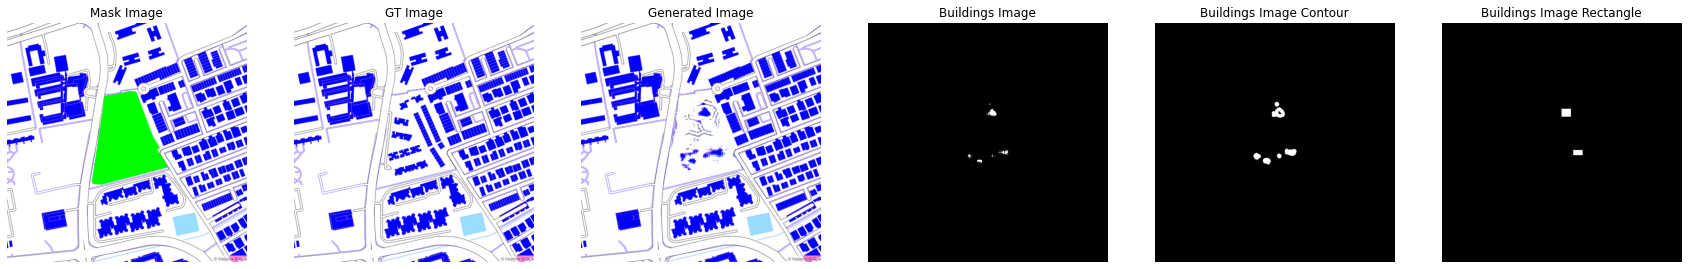

Image: 491.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:16,  Site area: 18747.8, Building pixels: 534, Mask pixels: 13058, Generated GPR: 0.6543115331597489


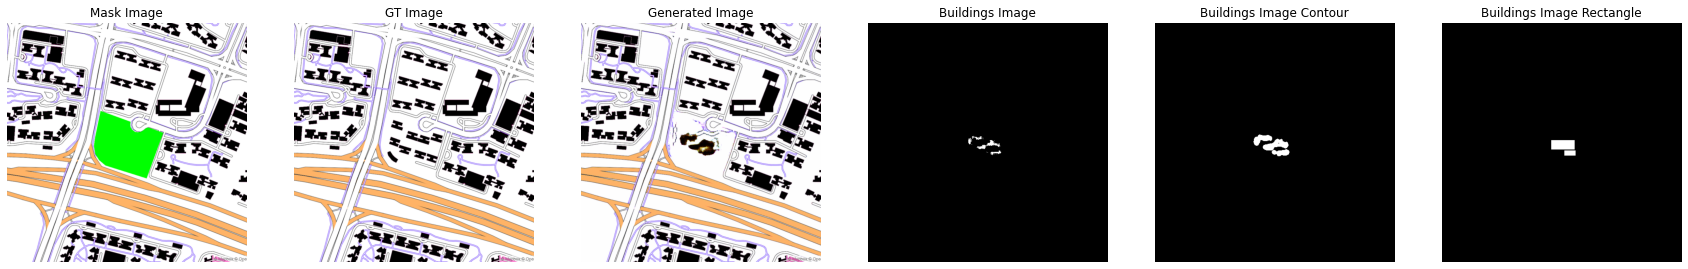

Image: 568.png, GPR: 3.4, Simplified GPR: 3.0, Storeys:19,  Site area: 14344.0, Building pixels: 704, Mask pixels: 10510, Generated GPR: 1.2726926736441484


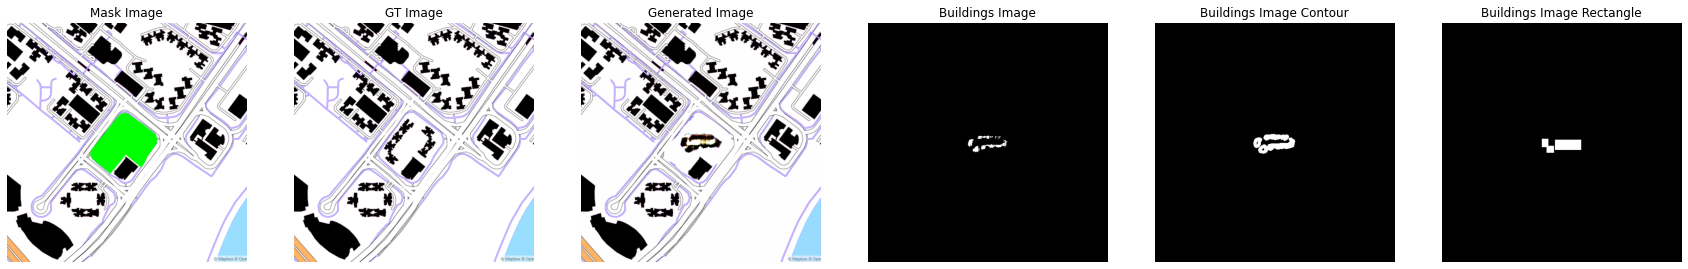

Accuracies:[0.24425811798520564, 0.7906046138707679, 0.14382577908413796, 0.75826705734617, 0.7833507488679903, 0.5223009636074472, 0.593577917295079, 0.6498044328552802, 0.5267349260523323, 0.7942448773911508, 0.43960092930955197, 0.4035542674090458, 0.45053056548187354, 0.7441828350479873, 0.059451408712920414, 0.45792011019283746, 0.8532502060766489, 0.8782032544090422, 0.781896155613417, 0.6256786253987799] 
Square error:[0.11693757527528229, 3.9065978467109126, 0.16217710107660857, 1.471920461456435, 5.522745561768371, 0.534684661307125, 2.762304392178851, 3.800212208625352, 2.4970471409102033, 2.781937920405791, 1.5150719800706018, 1.276791406473365, 0.3978364692494967, 2.4422936856320647, 0.043297257474896184, 1.8872174458711837, 3.210638381489012, 3.4011726162009315, 5.502254383467367, 4.525436460767282] 
Absolute error:[0.3419613651792879, 1.9765115346769198, 0.4027121814355863, 1.213227291753872, 2.350052246603971, 0.731221349050426, 1.6620181684262212, 1.9494132985658408, 1.

In [16]:

directory_path = os.getcwd()
parent_directory_path = os.path.dirname(directory_path)
csv_path = os.path.join(parent_directory_path, 'Model\\condo_data_new_FINAL_test.csv')
gt_masked_image_path = os.path.join(parent_directory_path, 'Model\\buildings\\test')
generated_image_path = os.path.join(parent_directory_path, 'Model\\buildings\\final_buildings_output_1') 

# Read the CSV file
data = pd.read_csv(csv_path)

# Function to extract the numeric part of the filename
def extract_numeric_part(filename):
    numeric_part = ''.join(filter(str.isdigit, filename))
    return int(numeric_part) if numeric_part else None

def create_binary_mask(arr, target_color, threshold=30):
    lower_bound = np.array(target_color) - threshold
    upper_bound = np.array(target_color) + threshold
    mask = (arr[:, :, :3] >= lower_bound) & (arr[:, :, :3] <= upper_bound)
    return np.all(mask, axis=-1)

def extract_building_regions(arr, target_color, threshold=10):
    lower_bound = np.array(target_color) - threshold
    upper_bound = np.array(target_color) + threshold
    mask = (arr[:, :, :3] >= lower_bound) & (arr[:, :, :3] <= upper_bound)
    return np.all(mask, axis=-1)

# def find_max_building_storeys(gpr):
#     max_building_storeys= 0
#     if gpr >= 0 and gpr < 1.4:
#         max_building_storeys = 5
#     elif gpr >= 1.4 and gpr < 1.6:
#         max_building_storeys = 12
#     elif gpr >= 1.6 and gpr < 2.1:
#         max_building_storeys = 24
#     elif gpr >= 2.1 and gpr < 2.8:
#         max_building_storeys = 36
#     elif gpr >= 2.8:
#         max_building_storeys = 48 ## by right got no limit
#     return max_building_storeys

def masked_rgb(simp_gpr):
    rgb = [0,0,0]
    if simp_gpr == 1.4:
        rgb = [255, 10, 169]
    elif simp_gpr == 1.6:
        rgb = [200,130,60]
    elif simp_gpr == 2.1:
        rgb = [0,0,255]
    elif simp_gpr == 2.8:
        rgb = [255,0,0]
    elif simp_gpr == 3.0:
        rgb =[0,0,0]
    return rgb

'''
pink, [255, 10, 169]
brown, [200,130,60]
cyan, [0,255,255]
red, [255,0,0]
black, [0,0,0]
green, [0,255,0]
blue, [0,0,255]
yellow, [255, 255, 0]
'''

# absolute_accuracies = []
# losses =[]
# images =[]
# sanity_ratios =[]

gprs =[]
generated_gprs =[]
sanity_ratios =[]

# Iterate through the images in the generated_image_path
for image_file in os.listdir(generated_image_path):
    if image_file.endswith('.png'):
        image_index = extract_numeric_part(image_file)

        # Construct the path for the corresponding masked image
        gt_mask_image_filename = f"{image_index}.png"
        gt_mask_image = os.path.join(gt_masked_image_path, gt_mask_image_filename)
        open_gt_mask_image = Image.open(gt_mask_image)
        mask_crop_box = (512, 0, 1024, 512) # right side
        mask_image = open_gt_mask_image.crop(mask_crop_box) #gt_mask is concatenated gt and mask
        gt_crop_box = (0, 0, 512, 512) # left side
        gt_image = open_gt_mask_image.crop(gt_crop_box)

        generated_image = os.path.join(generated_image_path, image_file)
        generated_image =  Image.open(generated_image)

        # Check if the image index matches any index in the CSV
        matched_row = data[data['key1'] == image_index]
        if not matched_row.empty:
            # Extract the GPR value for the matched row
            gpr_value = matched_row['GPR'].iloc[0]
            storey = matched_row['storeys'].iloc[0]
            simplified_gpr_value = matched_row['simp_gpr'].iloc[0]
            actual_site_area = matched_row['area'].iloc[0]
            actual_site_area = actual_site_area.replace(',', '')
            actual_site_area = float(actual_site_area[:-4])
            gpr_value = float(gpr_value)
            storey = int(storey)
            mask_array = np.array(mask_image)
            generated_array = np.array(generated_image)

            mask_color = [0,255,0] # green
            site_mask = create_binary_mask(mask_array, mask_color)
            site_area_array = generated_array.copy()
            site_area_array[~site_mask] = [255, 255, 255, 255] # making non-masked region white RMB ITS 4 CHANNELS NOW
            site_area_image = Image.fromarray(site_area_array)

            mask_color = masked_rgb(simplified_gpr_value)
            building_mask = extract_building_regions(site_area_array, mask_color)
            buildings_image = Image.fromarray(building_mask)

            building_pixels = np.sum(building_mask)
            mask_pixels = np.sum(site_mask)
            msq_per_pixel = actual_site_area/mask_pixels
            building_area = msq_per_pixel * building_pixels
            #max_storeys = find_max_building_storeys(gpr_value)
            generated_gpr = building_area*storey/actual_site_area
            gprs.append(gpr_value)
            generated_gprs.append(generated_gpr)

            print(f'Image: {image_file}, GPR: {gpr_value}, Simplified GPR: {simplified_gpr_value}, Storeys:{storey},  Site area: {actual_site_area}, Building pixels: {building_pixels}, Mask pixels: {mask_pixels}, Generated GPR: {generated_gpr}')

            # get contours
            building_mask = building_mask.astype(np.uint8) * 255
            blurred = cv2.GaussianBlur(building_mask, (5, 5), 0) # Apply GaussianBlur to reduce noise and improve edge detection
            edges = cv2.Canny(blurred, 50, 150) #Canny edge detection
            contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            approximated_contours = approx_contours(contours)
            original_approximated_contours = cv2.drawContours(building_mask.copy(), approximated_contours, -1, (255), 10)
            blank_image_for_contour = np.zeros_like(building_mask)
            approximated_contours_image = cv2.drawContours(blank_image_for_contour, approximated_contours, -1, (255), 5)
            
            #get rectangles
            blank_image_for_rectangle = np.zeros_like(building_mask)
            rectangles = [cv2.boundingRect(contour) for contour in approximated_contours]
            non_nested_rectangles = remove_nested_rectangles(rectangles)
            distance_threshold = 10
            merged_rectangles = merge_rectangles(non_nested_rectangles, distance_threshold)
            min_width = 10
            min_height = 10
            for x, y, w, h in merged_rectangles:
                if w >= min_width and h >= min_height:
                    cv2.rectangle(blank_image_for_rectangle, (x, y), (x + w, y + h), (255), -1)  # Fill the rectangle

            plt.figure(figsize=(30, 5))
            plt.subplot(1, 6, 1)
            plt.imshow(mask_image)
            plt.title('Mask Image')
            plt.axis('off')
            plt.subplot(1, 6, 2)
            plt.imshow(gt_image)
            plt.title('GT Image')
            plt.axis('off')
            plt.subplot(1, 6, 3)
            plt.imshow(generated_image)
            plt.title('Generated Image')
            plt.axis('off')
            plt.subplot(1, 6, 4)
            plt.imshow(buildings_image, cmap='gray')
            plt.title('Buildings Image')
            plt.axis('off')
            plt.subplot(1, 6, 5)
            plt.imshow(approximated_contours_image, cmap='gray')
            plt.title('Buildings Image Contour')
            plt.axis('off') 
            plt.subplot(1, 6, 6)
            plt.imshow(blank_image_for_rectangle, cmap='gray')
            plt.title('Buildings Image Rectangle')
            plt.axis('off') 
            plt.show()

total_data = len(gprs)
accuracies = []
absolute_error =[]
square_error =[]
for tar_gpr, gen_gpr in zip(gprs, generated_gprs):
    accuracies.append(abs((tar_gpr-gen_gpr)/tar_gpr))
    absolute_error.append(abs(tar_gpr-gen_gpr))
    square_error.append((tar_gpr-gen_gpr)**2)
accuracy = sum(accuracies)/total_data
mean_abs_error = sum(absolute_error)/total_data
root_squared_error = math.sqrt(sum(square_error)/total_data)
print(f"Accuracies:{accuracies} \nSquare error:{square_error} \nAbsolute error:{absolute_error} ")
print(f"\nAccuracy:{accuracy} MAE:{mean_abs_error} RMSE:{root_squared_error}")